https://www.kaggle.com/code/kanncaa1/heart-attack-analysis-prediction

In [87]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pawanbist/heart-attack-analysis-and-prediction-datasets")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\canoz\.cache\kagglehub\datasets\pawanbist\heart-attack-analysis-and-prediction-datasets\versions\1


### kütüphanelerin eklenmesi

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#makine öğrenmesi algoritmaları için kütüphaneler
from sklearn.linear_model import LogisticRegression #logistik regresyon için
from sklearn.preprocessing import StandardScaler #standartlaştırma işlemleri için 
from sklearn.model_selection import train_test_split , GridSearchCV #veri setinin eğitim ve test olarak bölünmesi için
from sklearn.metrics import roc_curve, accuracy_score #model başarısının ölçülmesi için


import warnings
warnings.filterwarnings("ignore") # uyarıları kapatalım ki konsolda hata olarak algılamayalım








### veri seti yüklenmesi ve incelenmesi 

In [89]:
df=pd.read_csv("heart.csv")


In [90]:
df.head(10) # cp değeri kategorik bir alan çünkü 0 1 2 değerlerini alabiliyor   

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [91]:
df.shape  ##  303 veri ve  14 stundan oluşan bir veri seti

(303, 14)

In [92]:
df.describe() #genel özelliklere bakalım  
#chol değerinde ortalama 250 ortalama ise 50 3 alfa(250+3*50) dan basitçe 400 den yukaru değerler  aykırı değer diyebiliriz  

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [93]:
df.corr() ["output"]# sonuç ile stunlar arasında korelasyonlar

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

In [94]:
df.info() #verileri ile ilgili bilgiler non değerler vs 
#!missing value yok gözküyor tüm değerler dolu 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### kayıp veri incelenmesi

In [95]:
df.isnull().sum() #tüm null değerlerin sayısı

#! verimizde null değerler yok bunu tespit ettik 



age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### kategorik ve numerik değişken analizi 

In [96]:
 #todo  kategorik veri anlizi demek bu verilerin veri seti içindeki dağılımına bakmaktır 

categorical_data = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output'] #  kategorik veriler  yani bir kategoriye göre olan verileri listeledik

df_categorical = df.loc[:,categorical_data] # kategorik verileri alıyoruz df olarak 


df_categorical # bakalım kategorik değerlere 

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


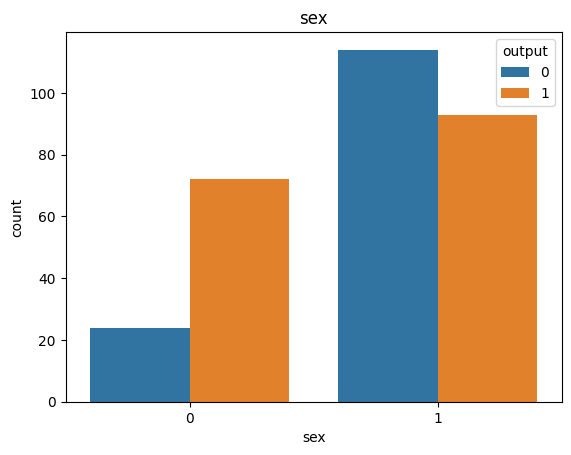

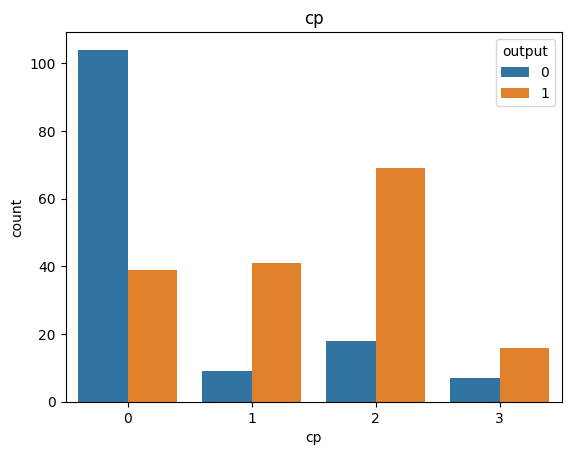

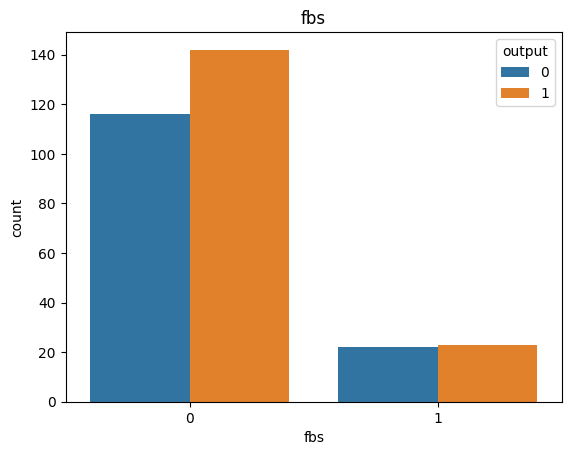

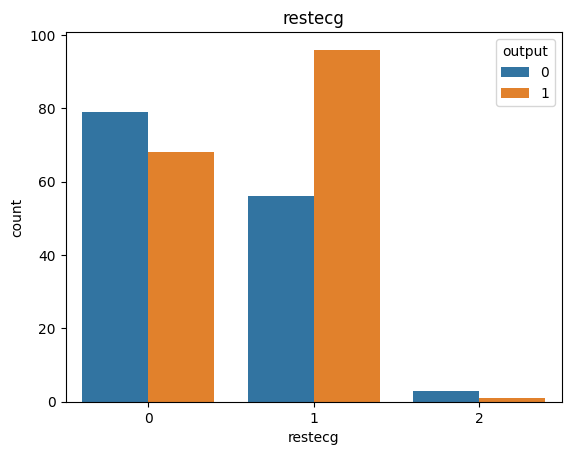

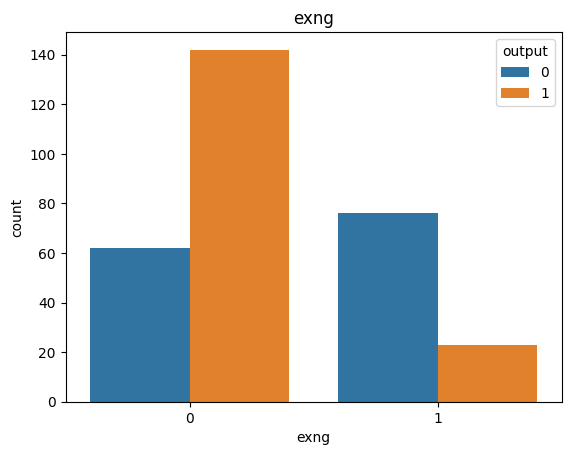

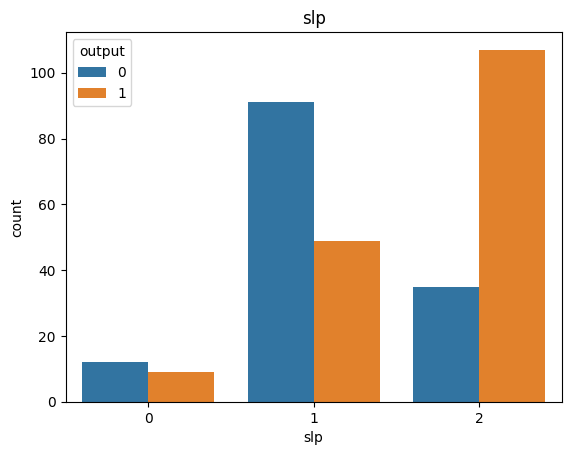

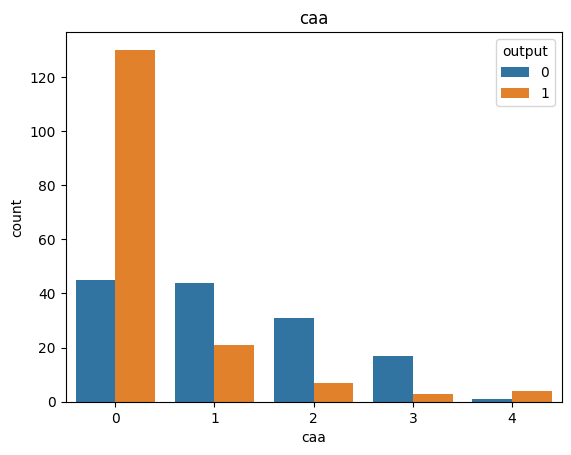

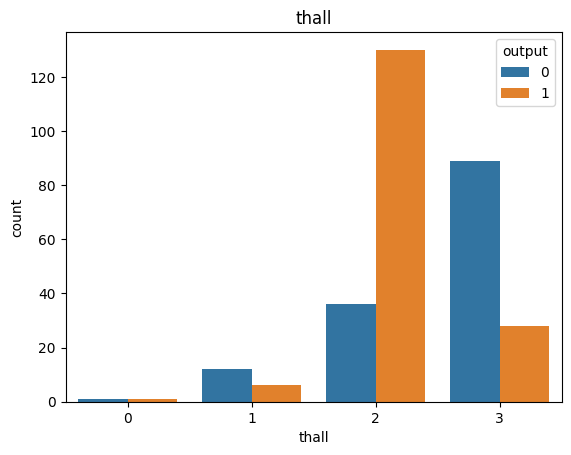

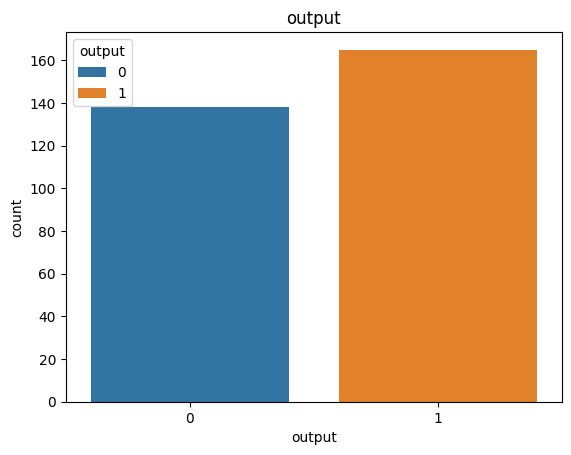

In [97]:
#kategorik verilerin output a göre dağılımlarına bakalım 

for i in categorical_data:
    plt.figure()
    sns.countplot(x=i, data=df_categorical,hue="output")
    plt.title(i)
    plt.show()

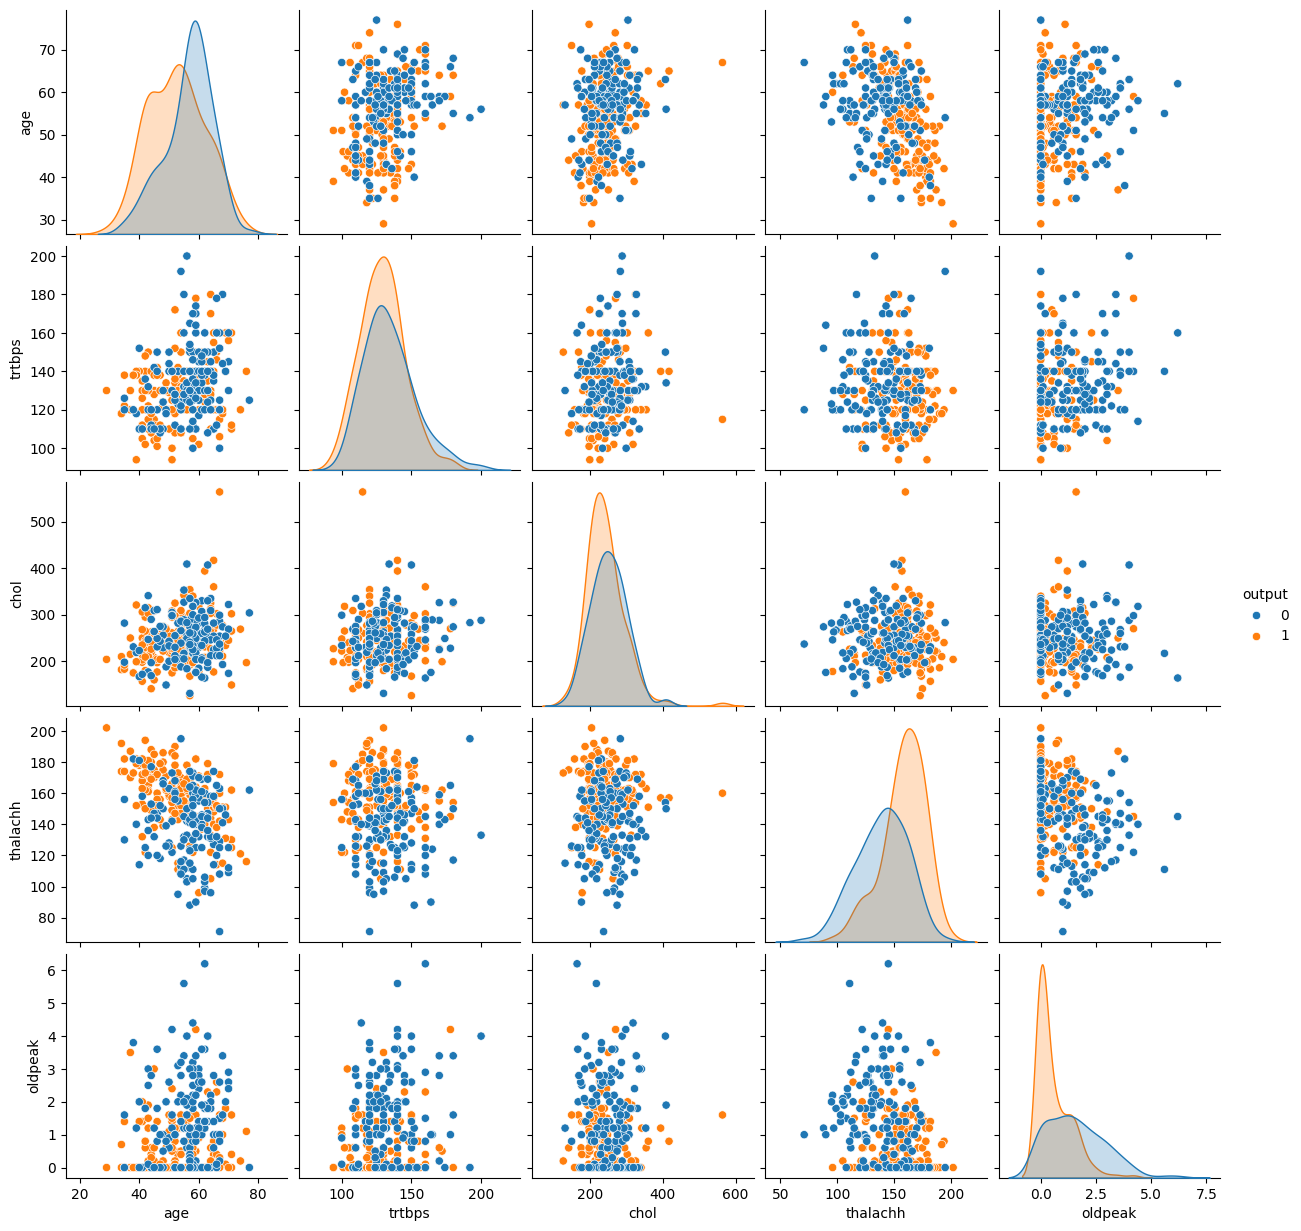

In [98]:
#nümerik değişkenlerin analizi yapılması



numeric_data=['age','trtbps','chol','thalachh','oldpeak','output'] #nümeric değişkenlerin isimleri
df_numeric=df.loc[:,numeric_data]
sns.pairplot(df_numeric , hue='output' , diag_kind='kde')
plt.show()


### eda: box ,swarm ,cat, correlasyon analizi

In [99]:
 #! box plotun anlamlı gözükebilmesi için verileri normalize etmemiz gerekir.
#! örnek olarak 250 gibi değerler ile 0.5 gibi değerler tablomuzda var burda 250 değerleini görebilirken 0.6 gibi küçük değerleri çok küçük
#!  göremeyiz güzel bir görüntü olmaz 
# ! bu yüzden normalize edelim

In [100]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_data[:-1]]) # output değeri hariçdeğerleri -1 0 1 arasına getirir
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]],
      shape=(303, 5))

#### box plot görselleştirme (çubuk grafik)

In [101]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_data[:-1]) #scaled data araryı dataframe ye dönüştürdük
df_dummy.head(3)#3 tanesin ilkini gösterdik

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912


In [102]:
#output ile dummy yi birleştirelim 
#başta outputu ayırıp standartize ettik şimdi ise tekrar outputu birleştiriyoruz 
# çünkü output normalize olmasını istemedki 0 yada 1 olarak kalmalı değerler normalizede 0.41 falan gibi değerler olurdu
df_dummy=pd.concat([df_dummy , df.loc[:,"output"] ], axis=1)
df_dummy.head(3) 


,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1


In [103]:
 #? box plot  görselleştirmede işimize yarayacak melted data 

data_melted=pd.melt(df_dummy,id_vars="output",var_name="features",value_name="value") 
data_melted

 # ?her stun ismi  output ve değer ile tek satırdan oluşan verileri oluşturduk 
# ? örnek: datamızın  ilk satır için : "age" +value +output  
# ?#burda age değerleri stun  isimleri ile değişip her satır için toplam 5 tane  features+ value+ output değerleri oluşuyor


,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
...,...,...,...
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373


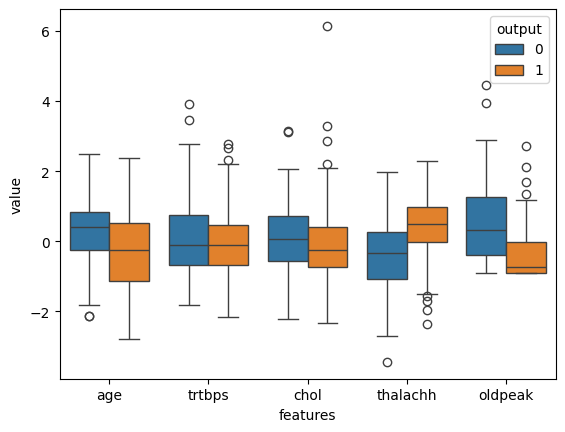

In [104]:
plt.figure()
sns.boxplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

#çubuk grafik

#### swarm plot görselleştirme 

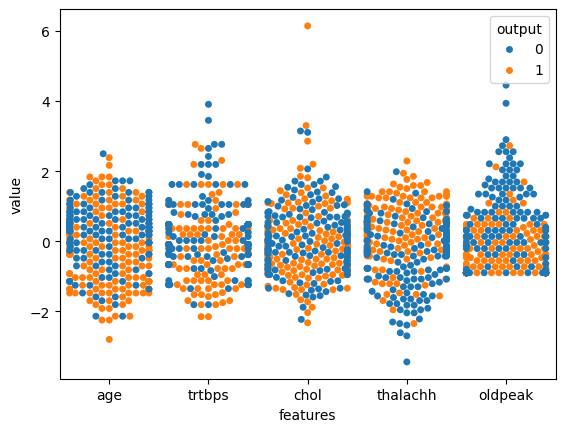

In [105]:
plt.figure()
sns.swarmplot(x='features', y='value', data=data_melted,hue="output")
plt.show()

#### cat plot görselleştirme

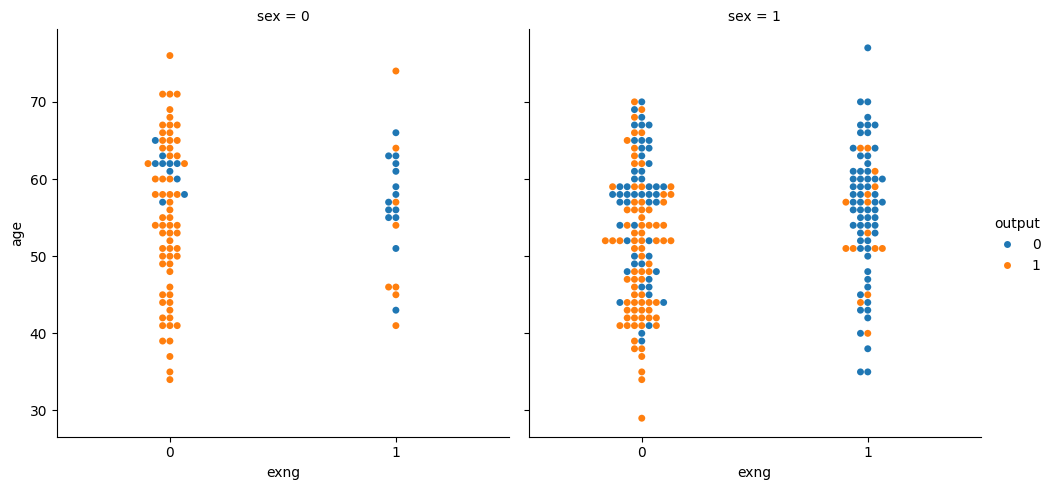

In [106]:
plt.Figure()
sns.catplot(x="exng",y="age" , hue="output" , col="sex" ,  kind="swarm", data=df ) #orijinal verimizi kullandık çükü veriler arası bir çizim yapacağız 
plt.show()
#cinsiyet 1 iken ve exng 1 iken kalp krizi riski düşük
#cinsiyet 0 iken ve exng 0 iken kalp krizi riski  yüksek

#### corelasyon

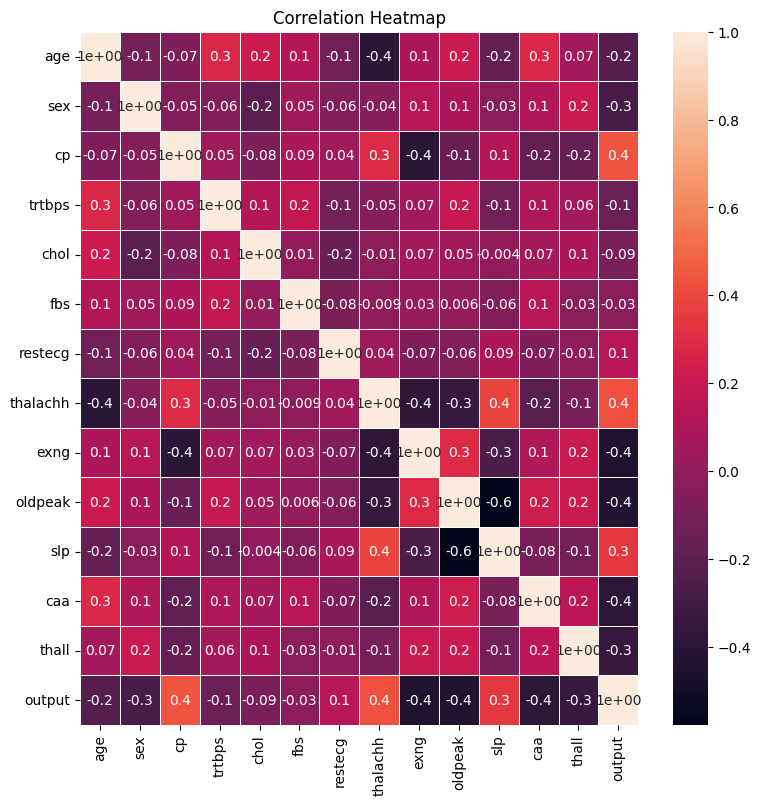

In [107]:
plt.figure(figsize=(9, 9))
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(df.corr(), fmt=".1", annot=True, linewidths=0.7)
plt.show()

eğer çok yüksek korelasyonlu değerler çıksaydı bunları çıkarmak gerekebilirdi 

### aykırı değer tespiti IQR ile aykırı değer bulma

In [108]:
numeric_data=['age','trtbps','chol','thalachh','oldpeak','output'] #nümeric değişkenlerin isimleri
df_numeric=df.loc[:,numeric_data] #numeric değişkenler dataframe olarak alınması 

#IQR= %75 -%25      
#üst sınır =%75 + 2.5*IQR
#alt sınır =%25 - 2.5*IQR
#BU SINIRLAR DIŞINDA KALAN DEĞERLER AYKIRI DEĞER OLARAK ADLANDIRILIR 

for i in numeric_data:
    q1=np.percentile(df.loc[:,i],25) #ilk çeyrek% 25 
    q3=np.percentile(df.loc[:,i],75) #üçüncü çeyrek %75

    print(f"{i} old shape: {df.loc[:,i].shape}")
    iqr=q3-q1 #IQR değeri 
    upper= np.where( df.loc[:,i] >= (q3 + 2.5*iqr) ) # üst sınır 
    lower= np.where( df.loc[:,i] <= (q1 - 2.5*iqr) ) # üst sınır 

    try:
        df.drop(upper[0],inplace=True) #upper 0. indexini çıkaracak ve dataframe ye eşitleyecek 
    except:
        print("hata")

    try:
        df.drop(lower[0],inplace=True) #lower 0. indexini çıkaracak ve dataframe ye eşitleyecek 
    except:
        print("hata")

    print("new shape: {df.shape}")

age old shape: (303,)
new shape: {df.shape}
trtbps old shape: (303,)
new shape: {df.shape}
chol old shape: (301,)
new shape: {df.shape}
thalachh old shape: (300,)
new shape: {df.shape}
oldpeak old shape: (300,)
new shape: {df.shape}
output old shape: (298,)
new shape: {df.shape}


### modelleme 

In [110]:
df1=df.copy()
df1=pd.get_dummies(df1,columns=categorical_data[:-1],drop_first=True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


In [ ]:
df 
# tüm kategorik verileri ayırarak veri setini oluşturduk
#örnek olarak sex için cp 0 1 2 değerleri alıyordu bizde  cp_1 cp_2 cp_3 şeklinde 3 değer oluşturduk 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [114]:
x=df1.drop(["output"],axis=1) # output dışındeki değerler için x'e atıyoruz
y=df1["output"] # output değerini y'e atıyoruz kalp krizi varmı yokmu değerini


 

In [ ]:
scaler = StandardScaler()
x[numeric_data[:-1]]= scaler.fit_transform(x[numeric_data[:-1]]) 
#x içinde bulunan numeric değerleri standart scaler ile ölçeklendirme işlemi gerçekleştirdik kategorik veriler zaten 0 ve 1 onları standartlama işlemi yapmadık 

train test split


In [115]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)


logistic regression modelimiz 

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

y_pred_prob =logreg.predict_proba(x_test) #olma olasılıklarını gösterir örnek olarak skal  krizi  olma olasılığı ve  olma olasılığı olarak her satır için hesaplar 
#sadece kalp krizi olmama olasılığı ve olma olasılığı olarak her satır için hesaplar


#sağlık alanında bu yöntem daha iy i hem ol hem de olmama olasılığını veririrz 

y_pred_prob
# ilk index için olmama olasılığı 0.07657511 olma olasılığı  0.92342489 dir


array([[0.07657511, 0.92342489],
       [0.9313693 , 0.0686307 ],
       [0.8856058 , 0.1143942 ],
       [0.03949306, 0.96050694],
       [0.11532585, 0.88467415],
       [0.36151663, 0.63848337],
       [0.08047251, 0.91952749],
       [0.22105657, 0.77894343],
       [0.40733714, 0.59266286],
       [0.73787996, 0.26212004],
       [0.40049417, 0.59950583],
       [0.98005097, 0.01994903],
       [0.95145925, 0.04854075],
       [0.1984686 , 0.8015314 ],
       [0.13045961, 0.86954039],
       [0.05322308, 0.94677692],
       [0.02654273, 0.97345727],
       [0.08079027, 0.91920973],
       [0.39528772, 0.60471228],
       [0.44339237, 0.55660763],
       [0.02668788, 0.97331212],
       [0.12669102, 0.87330898],
       [0.82053002, 0.17946998],
       [0.03993056, 0.96006944],
       [0.85963333, 0.14036667],
       [0.90545682, 0.09454318],
       [0.95022152, 0.04977848],
       [0.54898587, 0.45101413],
       [0.0326845 , 0.9673155 ],
       [0.60243168, 0.39756832],
       [0.

In [120]:
y_pred = np.argmax(y_pred_prob,axis=1) #olma olamama durumuna çevirdik 
#satırdaki en büyük olasılık değeri hangisinin ise onu yazar 0 yada 1 olarak  olma 0.95 olmama 0.05 ise fazla olan olma yani 1 değerini yazar 

y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [121]:
print(f"test accuracy:{accuracy_score(y_test,y_pred)}")


test accuracy:0.8833333333333333


#### roc curve 

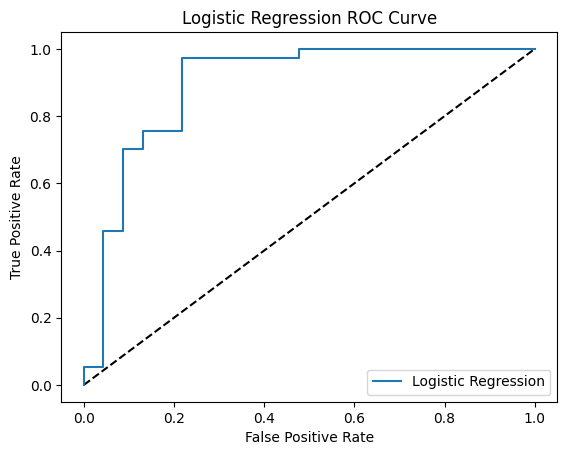

In [ ]:
 ##! sağlık alanında hasta olmayan birine hastasın demek 
 #! ile hasta olan birine hasta değilsin demek arasında ciddi farklar olabilir 

#? bunun için roc curve çizdirelim 
# 


fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1]) # fpr:false pozitif rate ,  tpr: true pozitif rate


plt.plot([0,1],[0,1],'k--') #tam 45 dereceden eğimli çizgi bu çizgi %50 demek gibi düşünebilirz 
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc=4) #legend: legend için 4 kısım sağ üstteki yerdeki yer
plt.show()


# sol üste yaklaşmak iyi bir model demek ve bizimki de öyle 

hyper parameter tuning

In [126]:
lr=LogisticRegression()
penalty=["l1","l2"]  # Overfitting  önlemek için kullanılır.

parameters={"penalty":penalty}

lr_searcher=GridSearchCV(lr,parameters,cv=10)
lr_searcher.fit(x_train,y_train)
print("Best Score: ",lr_searcher.best_score_)
print("Best Parameters: ",lr_searcher.best_params_)

Best Score:  0.8233695652173914
Best Parameters:  {'penalty': 'l2'}


In [128]:
y_pred=lr_searcher.predict(x_test)
print("Test accuracy:",accuracy_score(y_test,y_pred)) #başarımızı arttırmadı çunkü modelimizdeki verilerin sayısıs az bu daha fazla veri olan datalarda daha çok işe yarar

Test accuracy: 0.8833333333333333
